In [1]:
import warnings

warnings.simplefilter(action="ignore")

import functools
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
import os
import time
import torch
import torchnet as tnt

import torch.nn as nn

import matplotlib

# Weird behavior: loading twice in cell appears to remove an elsewise occuring error.
for i in range(2):
    try:
        matplotlib.use("TkAgg")  # rerun this cell if an error occurs.
    except:
        print("!")

print(torch.cuda.is_available())
np.random.seed(42)
torch.cuda.empty_cache()

# We import from other files

import sys
sys.path.append("/home/CGaydon/Documents/LIDAR PAC/plot_vegetation_coverage/")

from config import args
from utils.useful_functions import *
from data_loader.loader import *
from utils.load_las_data import load_all_las_from_folder, open_metadata_dataframe
from model.loss_functions import *
from model.accuracy import *
from em_gamma.get_gamma_parameters_em import *
from model.train import train_full
import laspy
print("Everything is imported")


print(torch.cuda.is_available())
np.random.seed(42)
torch.cuda.empty_cache()

False
Arguments were imported in PROD mode
Everything is imported
False


In [2]:
from laspy.file import File

# Parse LAS files
las = File('/home/CGaydon/Documents/LIDAR PAC/plot_vegetation_coverage/data/placettes_dataset/las_classes/2021_POINT_OBS98.las', mode="r")
x_las = las.X / 100  # we divide by 100 as all the values in las are in cm
y_las = las.Y / 100
z_las = las.Z / 100
r = las.Red
g = las.Green
b = las.Blue
nir = las.nir
intensity = las.intensity
return_nb = las.return_num
points_nparray = np.asarray(
    [x_las, y_las, z_las, r, g, b, nir, intensity, return_nb]
).T

In [3]:
(las.num_returns >= las.return_num).sum()

3206

In [26]:
import math
def scaled_scan_angle_to_degree(scan_angle, DIVISION_RATIO = 10000):
    """ Convert las scan angle info, which are minutes divided by 10000,  
    """
    DEGREE_BY_MINUTE = 1.0 / ((math.pi / (180 * 60)) / (math.pi / 180))
    degrees = scan_angle / DIVISION_RATIO * DEGREE_BY_MINUTE
    return degrees
scaled_scan_angle_to_degree(las.scan_angle)

array([-4.002, -4.002, -4.002, ..., -4.002, -4.002, -4.002])

<IPython.core.display.Javascript object>


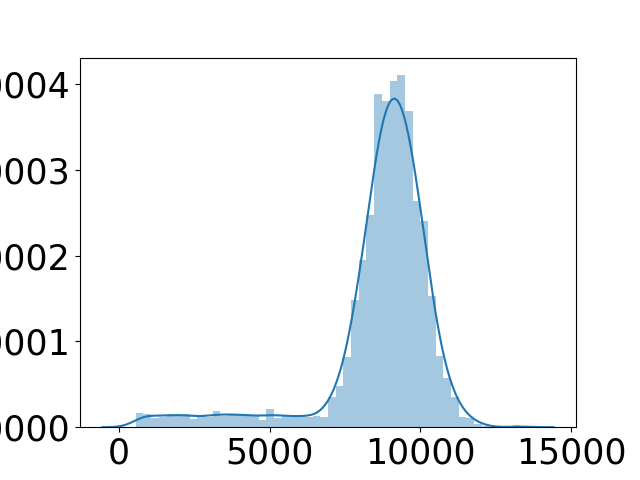

In [6]:
%matplotlib notebook
import seaborn as sns
plt.figure()
sns.distplot(las.intensity)
plt.show()

In [47]:
las.return_num

array([1, 1, 1, ..., 2, 1, 1], dtype=uint8)

In [80]:
a = np.random.random((5,5))
a[:2,:2] = np.nan
a

array([[       nan,        nan, 0.07404465, 0.35846573, 0.11586906],
       [       nan,        nan, 0.33089802, 0.06355835, 0.31098232],
       [0.32518332, 0.72960618, 0.63755747, 0.88721274, 0.47221493],
       [0.11959425, 0.71324479, 0.76078505, 0.5612772 , 0.77096718],
       [0.4937956 , 0.52273283, 0.42754102, 0.02541913, 0.10789143]])

In [79]:
anan = np.isnan(a)
anan

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [106]:
import numpy.ma as ma 
amask = ma.masked_invalid(a)
a[amask>0.5] = 1
a

array([[       nan,        nan, 0.07404465, 0.35846573, 0.11586906],
       [       nan,        nan, 0.33089802, 0.06355835, 0.31098232],
       [0.32518332, 1.        , 1.        , 1.        , 0.47221493],
       [0.11959425, 1.        , 1.        , 1.        , 1.        ],
       [0.4937956 , 1.        , 0.42754102, 0.02541913, 0.10789143]])

In [113]:
bool_mat = (amask>0.5) * 1.
bool_mat[amask.mask] = np.nan
bool_mat.data

array([[nan, nan,  0.,  0.,  0.],
       [nan, nan,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [108]:
amask.mask

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])